# Day 1 - Linear Regression (Andrew Ng ML Specialization)
### Machine Learning Roadmap - Week 2 
### Author - N Manish Kumar 
---

Today I begin Week 2 by understanding the foundations of Linear Regression.

This includes the model function, cost function, and gradient descent using Andrew Ng’s notation (w, b, $f_{w,b}(x)$) used in the ML Specialization.

---

## 1. Linear Regression Theory

### 1.1. Hypothesis / Model Function
$$
f_{w,b}(x) = w \cdot x + b
$$

### 1.2. Cost Function
$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}
\left( f_{w,b}(x^{(i)} - y^{(i)} \right)^2
$$

### 1.3. Gradient Descent (Update Rules)
$$
b := b - \alpha \cdot \frac{1}{m}
\sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})
$$

$$
w := w - \alpha \cdot \frac{1}{m}
\sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)}) \cdot x^{(i)}
$$

### Summary 
- Model uses w (weight) and b (bias)
- Cost Function measures error
- Gradient Descent minimizes cost
- Learning Rate $\alpha\$ controls step size

---

## 2. Load a Simple Dataset
Importing California Housing dataset from sklearn.

In [2]:
from sklearn.datasets import fetch_california_housing

# # Load dataset as pandas-friendly format
data = fetch_california_housing(as_frame=True)
df= data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


This Dataset consists of 8 Features and 1 Target (MedHouseVal)

---


## 3. Train/Test Split
We now seperate (X) and target (y), then split into train/test sets.

In [11]:
from sklearn.model_selection import train_test_split

X= df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train , y_test = train_test_split(
    X, y, test_size= 0.2, random_state= 42
)

X_train.shape , X_test.shape

((16512, 8), (4128, 8))

---
## 4. Train Linear Regression Model on California Housing


In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("w (coefficients) : \n",model.coef_)
print("\nb (intercept) : ",model.intercept_)

w (coefficients) : 
 [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]

b (intercept) :  -37.023277706064064


### Interpretation

- Coefficients tell you how each feature affects the house price

- If AveRooms increases by 1 → price changes by wᵢ units

- Intercept = predicted price when all features are zero

### Visualization

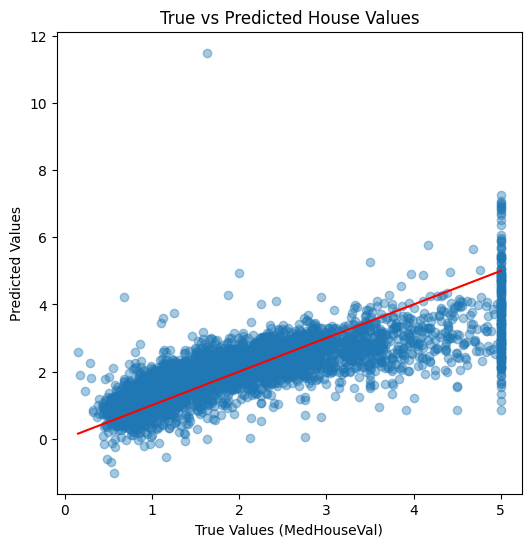

In [30]:
import matplotlib.pyplot as plt 
y_pred = model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("True Values (MedHouseVal)")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted House Values")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red"
)
plt.show()

---
## 5. Feature Scaling 
Gradient Descent will not converge without scaling.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, y, test_size= 0.2, random_state = 42
)

X_train_s.shape

(16512, 8)

---

## 6. Gradient Descent on California Housing (Multivariate Linear Regression)
We represent :
- X as (m,n)
- w as (n,)
- b as scalar
- $f_{w,b}(x) = X \cdot w +b $

In [26]:
# Intialize parameters
m, n = X_train_s.shape
w = np.zeros(n)
b = 0

alpha = 0.01
epochs = 300
cost_history = []

def compute_cost(X, y, w, b):
    m= len(y)
    y_pred = X.dot(w) +b
    cost = (1/(2*m))*np.sum((y_pred - y)**2)
    return cost

def gradient_descent(X, y , w, b, alpha, epochs):
    m = len(y)
    cost_history= []
    for i in range(epochs):
        y_pred = X.dot(w) + b
        error = y_pred - y

        dj_dw = (1/m) * X.T.dot(error)
        dj_db = (1/m) * np.sum(error)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost_history.append(compute_cost(X, y, w, b))
    return w, b, cost_history

w_gd, b_gd, cost_history = gradient_descent(
    X_train_s, y_train_s, w, b, alpha, epochs
)

w_gd, b_gd

(array([ 0.74480572,  0.18281124,  0.03214306, -0.02512215,  0.01001026,
        -0.03645615, -0.23444416, -0.1886094 ]),
 np.float64(1.9674099876872309))

---

## 7. Convergence Plot

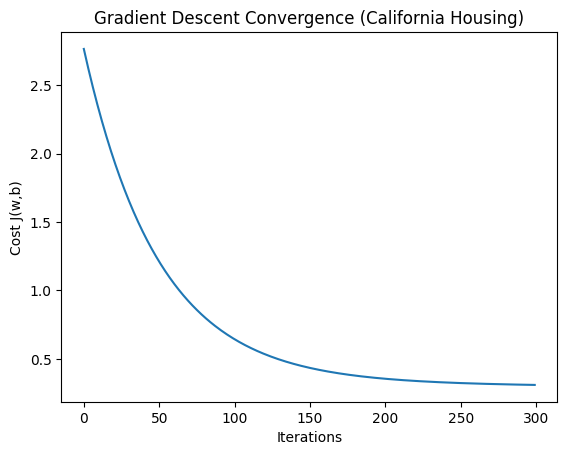

In [27]:
# Plot Cost vs Iterations for Gradient Descent 
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent Convergence (California Housing)")
plt.show()

---
## 8. Compare gradient Descent vs Sklearn Weights

In [29]:
print("Sklearn Coefficients:\n", model.coef_)
print("\nGradient Descent Coefficients:\n", w_gd)

print("\nSklearn Intercept:", model.intercept_)
print("GD Intercept:", b_gd)

Sklearn Coefficients:
 [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]

Gradient Descent Coefficients:
 [ 0.74480572  0.18281124  0.03214306 -0.02512215  0.01001026 -0.03645615
 -0.23444416 -0.1886094 ]

Sklearn Intercept: -37.023277706064064
GD Intercept: 1.9674099876872309


---
# 📝 Day 8 Summary — California Housing Linear Regression

Today I completed:

- Review of Linear Regression theory using Andrew Ng notation (w, b, f_{w,b}(x))
- Loading the California Housing dataset
- Performing a train/test split
- Training a Linear Regression model using sklearn
- Implementing multivariate Gradient Descent from scratch
- Plotting cost convergence over iterations
- Comparing manual GD parameters with sklearn's Normal Equation solution
- Visualizing True vs Predicted values

This completes Week 2 — Day 1.